In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt  
#use this code of matplotlib to show image using plt.imshow() 
%matplotlib inline


In [2]:
img = cv2.imread("./test_images/Manu Bhaker1.jpg")
img.shape

(284, 177, 3)

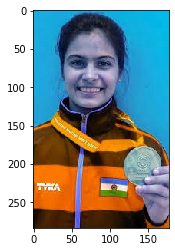

In [3]:
plt.imshow(img)

# 2. Preprocessing

<h3>Detect face and eyes

In [4]:
#to change image to gray image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(284, 177)

In [5]:
#n-dimensional array of numbers from 0-255
gray

array([[171, 170, 170, ..., 179, 179, 179],
       [171, 171, 170, ..., 179, 179, 179],
       [171, 171, 171, ..., 179, 179, 179],
       ...,
       [ 10,  12,  17, ...,  83,  82,  84],
       [ 10,  13,  17, ...,  81,  82,  84],
       [ 11,  13,  17, ...,  80,  82,  83]], dtype=uint8)

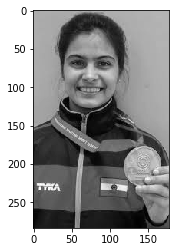

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
#load .xml files for face and detection from openCV Haar Cascade
face_cascade = cv2.CascadeClassifier('./opencv/HaarCascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/HaarCascade/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces
# it returns a array of faces that X-axis,Y-axis, width and height

array([[24, 31, 99, 99]], dtype=int32)

<h3>2.1 Code for Face detection

In [8]:
#draw the face to know how it looks
(x,y,w,h) = faces[0]
x,y,w,h

(24, 31, 99, 99)

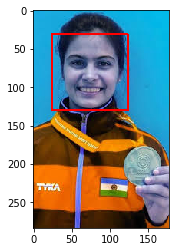

In [9]:
#in image draw a red rectangle RGB-(255,0,0) and rectangle dimension will start with (x,y) and ends with (x+w,y+h)
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

<h3>2.2 Code for eyes detection

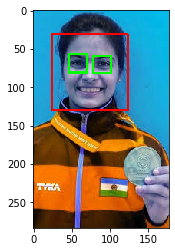

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        # now the RGB-(0,255,0) green color
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


<h3>2.3 Crop the facial region of the image

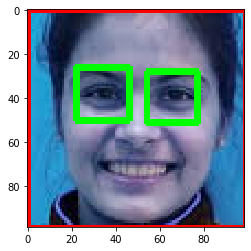

In [11]:
#here roi stands for Region For Interest as we are interested in only face
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(99, 99, 3)

<h3>2.3 Preprocessing: Use wavelet transform as a feature for traning our model
<h4>In WAVELET Transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc¶

In [13]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

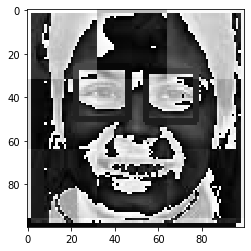

In [14]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [15]:
#You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

<h3>Crop the faces from all the images in the same way and store the cropped images into a new folder

# Write the same code but now using Function so that we can call it for other images also

<h4>Write a function that can take input image and returns cropped  images (if gace and eyes >=2 are detected)

In [16]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

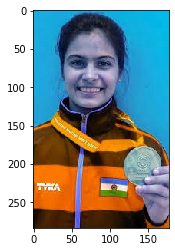

In [17]:
original_image = cv2.imread("./test_images/Manu Bhaker1.jpg")
plt.imshow(original_image)

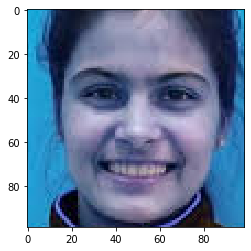

In [18]:
cropped_image = get_cropped_image_if_2_eyes("./test_images/Manu Bhaker1.jpg")
plt.imshow(cropped_image)

<h3>Ignore the images in which face is not clear and two eyes are not clearly visible

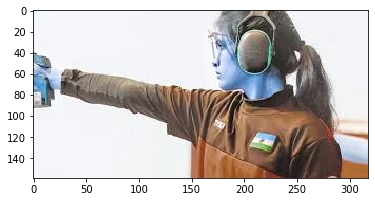

In [19]:
org_image_obstructed = cv2.imread("./test_images/Manu Bhaker2.jpg")
plt.imshow(org_image_obstructed)

In [20]:
#call the function for two eyes
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/Manu Bhaker2.jpg')
cropped_image_no_2_eyes

In [21]:
#output doesn't return anything as the two eyes are not visible so it ignored the image

<h3>Create a new folder named Cropped that contains all the cropped images of the face

In [22]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [23]:
#first store the path of all the individual subfolders in a python list
#use python OS Module and scan the directory which will go through all the sub-directories 
#names of those sub-directories will be stored in the image directory variable img_dirc

import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        
img_dirs

['./dataset/dhoni',
 './dataset/leander paes',
 './dataset/manu bhaker',
 './dataset/mary kom',
 './dataset/pv sindhu',
 './dataset/smriti mandhana',
 './dataset/sunil chetri',
 './dataset/virat kohli']

In [24]:
#after yo run this code, it will generate cropped folder within dataset folder

import shutil
#if cropped folder already exists then remove it and then create the cropped folder
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [25]:
#cropped image directory is similar to image directory but it contain the cropped folder path for each player
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    
    #split the directory for each player by slash and -1 will return the last element from the list i.e the name of the celebrity
    celebrity_name = img_dir.split('/')[-1]
    
    #initialze the key for celerity names file by having a blank array
    celebrity_file_names_dict[celebrity_name] = []
    
    #now iterate through each of these folders and iterate through all the images
    # os.scandir will give the iterator which will help to go through each of the images or each of the files from that folders
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        
        # return cropped image if face and eyes are clear
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            
            #if cropped folder doesn't exist than create it first
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            
            #now generate the name of a cropped image file and also define count =1 before starting loop
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            #now save the cropped image into the cropped file path by using .imwrite(file path, region of interest) function
            cv2.imwrite(cropped_file_path, roi_color)
            
            #now store the name of all the celebrity into a dictionary where key= name of celecrity and the value = list of file paths
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/dhoni
Generating cropped images in folder:  ./dataset/cropped/leander paes
Generating cropped images in folder:  ./dataset/cropped/manu bhaker
Generating cropped images in folder:  ./dataset/cropped/mary kom
Generating cropped images in folder:  ./dataset/cropped/pv sindhu
Generating cropped images in folder:  ./dataset/cropped/smriti mandhana
Generating cropped images in folder:  ./dataset/cropped/sunil chetri
Generating cropped images in folder:  ./dataset/cropped/virat kohli


# Data Cleaning

<h3>Manual Cleaning - Manually examine cropped folder and delete any unwanted images

In [27]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'dhoni': ['./dataset/cropped/dhoni\\dhoni1.png',
  './dataset/cropped/dhoni\\dhoni10.png',
  './dataset/cropped/dhoni\\dhoni13.png',
  './dataset/cropped/dhoni\\dhoni14.png',
  './dataset/cropped/dhoni\\dhoni15.png',
  './dataset/cropped/dhoni\\dhoni2.png',
  './dataset/cropped/dhoni\\dhoni3.png',
  './dataset/cropped/dhoni\\dhoni4.png',
  './dataset/cropped/dhoni\\dhoni5.png',
  './dataset/cropped/dhoni\\dhoni6.png',
  './dataset/cropped/dhoni\\dhoni7.png',
  './dataset/cropped/dhoni\\dhoni8.png',
  './dataset/cropped/dhoni\\dhoni9.png'],
 'leander paes': ['./dataset/cropped/leander paes\\leander paes1.png',
  './dataset/cropped/leander paes\\leander paes10.png',
  './dataset/cropped/leander paes\\leander paes11.png',
  './dataset/cropped/leander paes\\leander paes12.png',
  './dataset/cropped/leander paes\\leander paes2.png',
  './dataset/cropped/leander paes\\leander paes3.png',
  './dataset/cropped/leander paes\\leander paes4.png',
  './dataset/cropped/leander paes\\leander paes5.

<h3>Images in cropped folder can be used for model training.<br>
We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [28]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'dhoni': 0,
 'leander paes': 1,
 'manu bhaker': 2,
 'mary kom': 3,
 'pv sindhu': 4,
 'smriti mandhana': 5,
 'sunil chetri': 6,
 'virat kohli': 7}

In [29]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [30]:
#size of each image is 4096
len(X[0])

4096

In [31]:
32*32*3+32*32

4096

In [32]:
X[0]

array([[46],
       [40],
       [35],
       ...,
       [63],
       [63],
       [63]], dtype=uint8)

In [33]:
#reshape the image to type float to make sure the shape is 164 * 4096

X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(195, 4096)

In [34]:
X[0]
#images are converted to float as we get . after that

array([46., 40., 35., ..., 63., 63., 63.])

# 3. Train the Model

<h3> Use SVM with RBF Kernel tuned with heuristic fine tuning

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#create sklearn Pipeline so that we can scale the data first
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6938775510204082

In [37]:
len(X_test)

49

In [38]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         2
           2       0.83      1.00      0.91         5
           3       0.57      0.44      0.50         9
           4       0.50      0.50      0.50         2
           5       0.61      0.93      0.74        15
           6       0.00      0.00      0.00         1
           7       0.91      1.00      0.95        10

    accuracy                           0.69        49
   macro avg       0.43      0.48      0.45        49
weighted avg       0.58      0.69      0.62        49



C:\Users\Anubhuti Singh\AppData\Local\Programs\python\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3>GridSearch to try out different models with different parameters. 
<h4>Goal is to come up with best model with best fine tuned parameters.


In [39]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [40]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [41]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.575172,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.376782,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.657471,{'logisticregression__C': 1}


In [43]:
best_estimators

{'svm': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svc',
                  SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                      coef0=0.0, decision_function_shape='ovr', degree=3,
                      gamma='auto', kernel='linear', max_iter=-1,
                      probability=True, random_state=None, shrinking=True,
                      tol=0.001, verbose=False))],
          verbose=False),
 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                   

In [44]:
best_estimators['svm'].score(X_test,y_test)

0.7346938775510204

In [45]:
best_estimators['random_forest'].score(X_test,y_test)

0.5510204081632653

In [46]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.673469387755102

In [47]:
#choose the best estimator which performs good for both train and test score
best_clf = best_estimators['svm']

In [49]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 0,  0,  0,  1,  1,  2,  0,  1],
       [ 0,  0,  0,  0,  1,  1,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  2,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 14,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

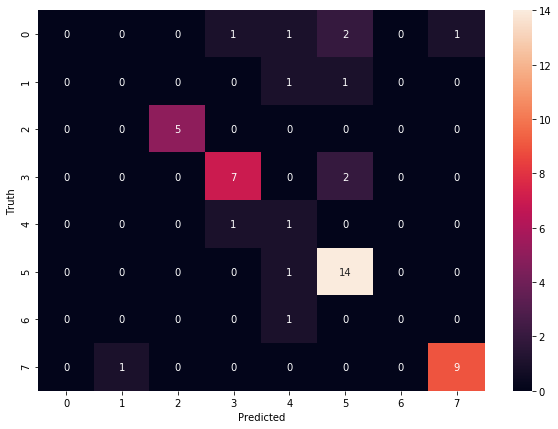

In [50]:
#confusion matrix- Visualization
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
class_dict

{'dhoni': 0,
 'leander paes': 1,
 'manu bhaker': 2,
 'mary kom': 3,
 'pv sindhu': 4,
 'smriti mandhana': 5,
 'sunil chetri': 6,
 'virat kohli': 7}

# 5. Save the Model

In [52]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

<h3>Save Class Dictionary

In [53]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))